# <h1><center>Customer Churn Rate Case Study</center></h1>

Project Overview:
    - Used Logistic Regression to predict customer’s likelihood to unsubscribe from service given features about 
      the customers purchase history and app usage patterns.
    - Visualized data in a meaningful and intuitive way using Matplot.

=======================================================================================================================

Context: dataset contains app subscription users' info and whether they churned or not.

Objective: Derive insights from customers's info, behavior and credit score to determine what's likely to cause them to churn.

Attribute Information:
1. userid - MongoDB userid
2. churn  - Active = No | Suspended < 30 = No Else Churn = Yes
3. age - age of the customer
4. city - city of the customer
5. state- state where the customer lives
6. postal_code - zip code of the customer
7. zodiac_sign- zodiac sign of the customer
8. rent_or_own - Does the customer rents or owns a house 
9. more_than_one_mobile_device - does the customer use more than one mobile device
10. payFreq- Pay Frequency of the cusomter
11. in_collections - is the customer in collections
12. loan_pending - is the loan pending
13. withdrawn_application - has the customer withdrawn the loan applicaiton 
14. paid_off_loan- has the customer paid of the loan
15. did_not_accept_funding - customer did not accept funding
16. cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
17. cash_back_amount - Sum of cash back dollars received by a customer
18. used_ios- Has the user used an iphone
19. used_android - Has the user used a android based phone
20. has_used_mobile_and_web - Has the user used mobile and web platforms
21. has_used_web - Has the user used MoneyLion Web app
22. has_used_mobile - as the user used MoneyLion  app
23. has_reffered- Has the user referred
24. cards_clicked - How many times a user has clicked the cards
25. cards_not_helpful- How helpful was the cards
26. cards_helpful- How helpful was the cards
27. cards_viewed- How many times a user viewed the cards
28. cards_share- How many times a user shared his cards
29. trivia_view_results-How many times a user viewed trivia results
30. trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
31. trivia_view_locked - How many times a user viewed trivia view locked screen
32. trivia_shared_results- How many times a user shared trivia results 
33. trivia_played - How many times a user played trivia 
34. re_linked_account- Has the user re linked account
35. un_linked_account - Has the user un linked account
36. credit_score - Customer's credit score

In [5]:
##Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#import the dataset
df = pd.read_csv('churn_data.csv')

In [7]:
#EDA
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [8]:
df.shape

(27000, 31)

In [9]:
df.keys()

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [10]:
#check and drop null values
df.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [11]:
df = df[pd.notnull(df['age'])]

In [12]:
df

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0
5,3120,1,32.0,R,567.0,5,3,111,5,0,...,0,0,0,0,Taurus,0,0,55.0,1.83,0
6,41406,0,21.0,na,475.0,0,0,4,0,0,...,0,0,0,0,Cancer,0,0,2.0,0.07,0
7,67679,0,24.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Leo,0,0,1.0,0.11,0
8,21269,0,28.0,R,548.0,0,0,0,0,2,...,0,0,0,0,Sagittarius,0,0,26.0,0.87,1
9,25788,0,23.0,na,658.0,1,0,87,1,0,...,0,0,0,0,Aquarius,0,0,32.0,1.07,0


In [13]:
df = df.drop(columns = ['credit_score', 'rewards_earned'])

In [15]:
df2 = df.drop(columns=['user', 'churn'])

In [17]:
df2 = df[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

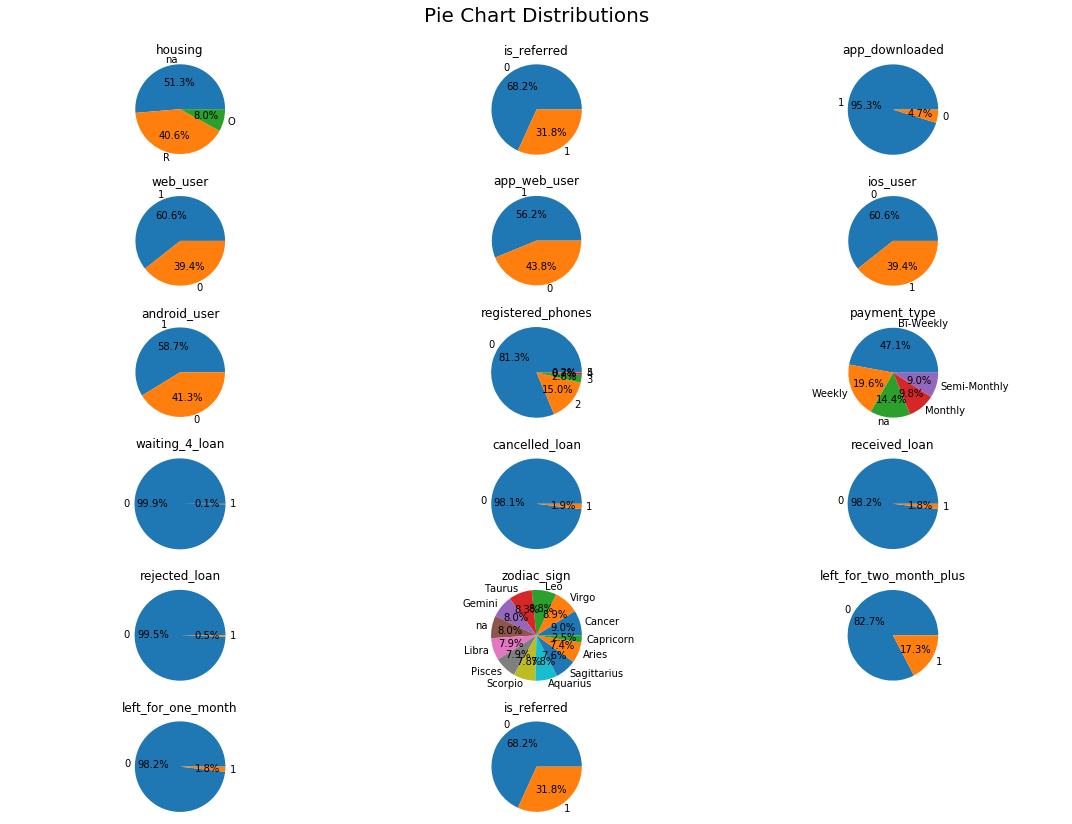

In [18]:
#visualize dataset
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [19]:
df[df2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [20]:
df[df2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [21]:
df[df2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [22]:
df[df2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [23]:
df[df2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

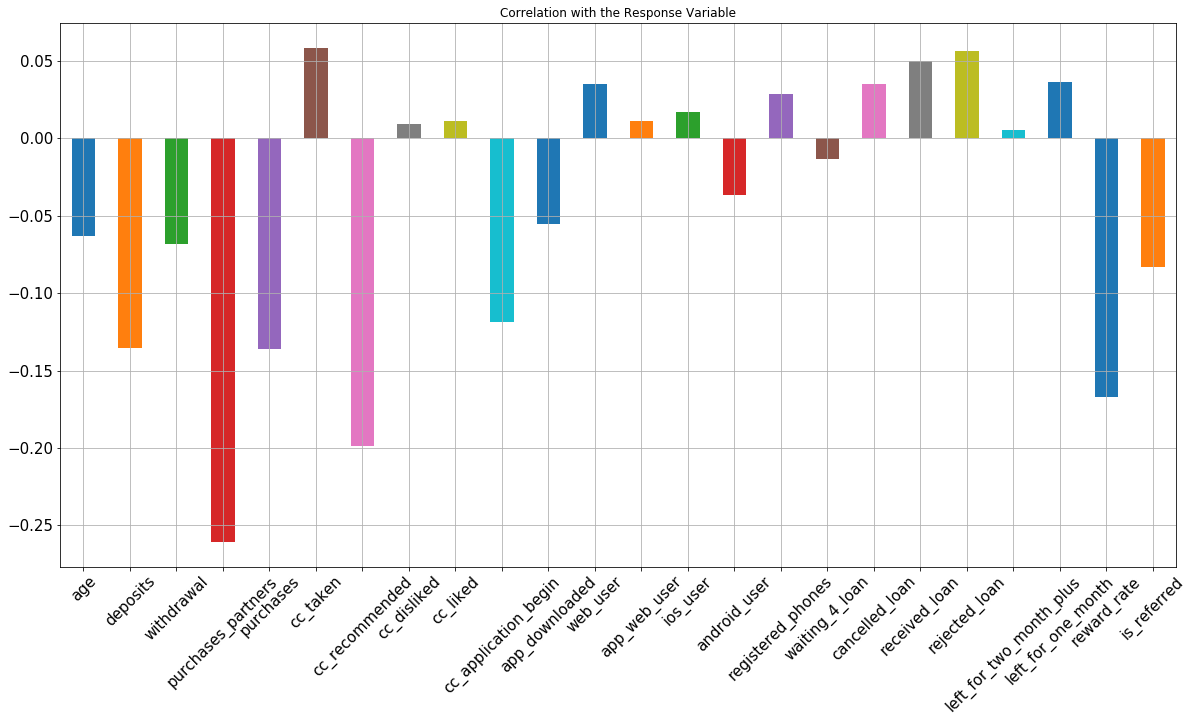

In [25]:
#Visualize correlation
df.drop(columns = ['churn', 'user', 'housing','payment_type','zodiac_sign']).corrwith(df.churn).plot.bar(
    figsize = (20,10), title = 'Correlation with the Response Variable', fontsize = 15,
    rot = 45, grid = True)

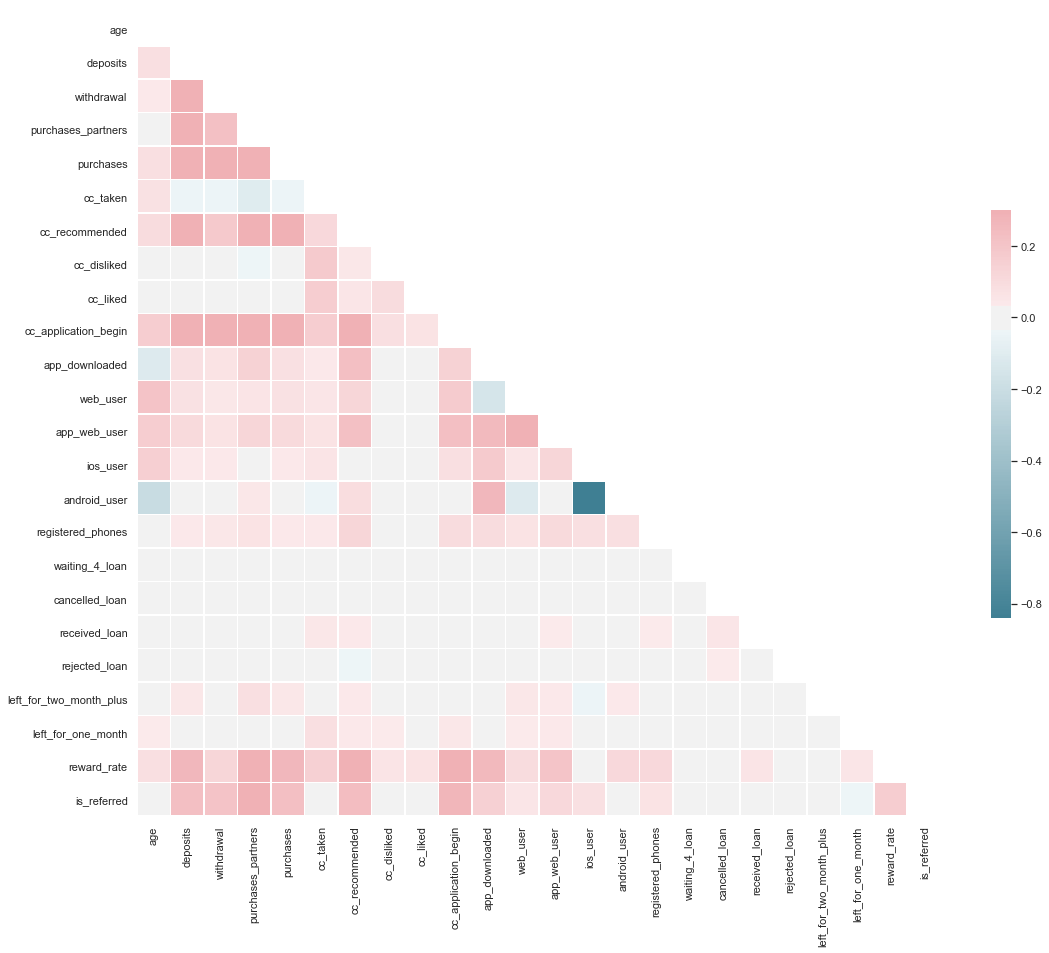

In [26]:
#visualize correlation using heatmap
sns.set(style="white")

corr = df.drop(columns = ['user', 'churn']).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
##create a new dataset for modeling

df = df.drop(columns = ['app_web_user'])
df.to_csv('new_churn_data.csv', index = False)

In [28]:
df = pd.read_csv('new_churn_data.csv')

In [29]:
user_identifier = df['user']

In [32]:
df = df.drop(columns = ['user'])

In [30]:
#Feature engineering

In [31]:
#one hot encoding using dummies (to switch cateogiracal data to numeric
df.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [32]:
df = pd.get_dummies(df)

In [33]:
df.head()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,55409,0,37.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,23547,0,28.0,0,0,1,0,0,96,0,...,0,0,1,0,0,0,0,0,0,0
2,58313,0,35.0,47,2,86,47,0,285,0,...,1,0,0,0,0,0,0,0,0,0
3,8095,0,26.0,26,3,38,25,0,74,0,...,1,0,0,0,0,0,0,0,0,0
4,61353,1,27.0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.shape

(26996, 46)

In [35]:
df = df.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [36]:
##split the dataset into X and y
X = df.drop(columns = 'churn')

In [37]:
X

,user,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,55409,37.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,23547,28.0,0,0,1,0,0,96,0,0,...,0,0,0,1,0,0,0,0,0,0
2,58313,35.0,47,2,86,47,0,285,0,0,...,0,1,0,0,0,0,0,0,0,0
3,8095,26.0,26,3,38,25,0,74,0,0,...,0,1,0,0,0,0,0,0,0,0
4,61353,27.0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3120,32.0,5,3,111,5,0,227,0,0,...,0,0,0,0,0,0,0,0,1,0
6,41406,21.0,0,0,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,67679,24.0,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,21269,28.0,0,0,0,0,2,47,1,0,...,0,0,0,0,0,0,1,0,0,0
9,25788,23.0,1,0,87,1,0,125,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y = df['churn']

In [39]:
y

0        0
1        0
2        0
3        0
4        1
5        1
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       1
17       0
18       0
19       1
20       1
21       1
22       0
23       1
24       0
25       1
26       1
27       1
28       1
29       0
        ..
26966    1
26967    1
26968    0
26969    1
26970    0
26971    0
26972    0
26973    1
26974    0
26975    1
26976    0
26977    0
26978    0
26979    1
26980    0
26981    0
26982    0
26983    0
26984    0
26985    0
26986    0
26987    0
26988    1
26989    0
26990    1
26991    1
26992    1
26993    0
26994    1
26995    1
Name: churn, Length: 26996, dtype: int64

In [40]:
##split the dataset to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [41]:
X_train.shape

(21596, 42)

In [42]:
X_test.shape

(5400, 42)

In [43]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [44]:
y_test.value_counts()

0    3166
1    2234
Name: churn, dtype: int64

In [45]:
#balancing the trainingset
pos_index = y_train[y_train.values == 1].index

In [46]:
neg_index = y_train[y_train.values == 0].index

In [47]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

In [48]:
import random
random.seed(0)

In [49]:
higher = np.random.choice(higher, size = len(lower))

In [50]:
lower = np.asarray(lower)

In [51]:
new_indexes = np.concatenate((lower, higher))
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [52]:
#feature scaling - normalize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [53]:
##model building

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
#evaluate the model

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [58]:
accuracy_score(y_test, y_pred)

0.6144444444444445

In [59]:
precision_score(y_test, y_pred)

0.5238993710691824

In [60]:
recall_score(y_test, y_pred)

0.7457475380483438

In [61]:
f1_score(y_test, y_pred)

0.615441448097525

Test Data Accuracy: 0.6144


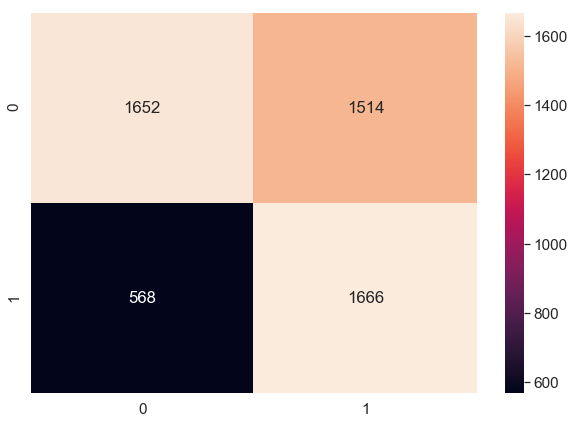

In [62]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot = True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [63]:
##optimize the model

In [64]:
#apply k-fold cross validation

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [67]:
accuracies

array([0.64765101, 0.66442953, 0.64541387, 0.63702461, 0.65995526,
       0.64932886, 0.64205817, 0.65324385, 0.651566  , 0.65995526])

In [68]:
accuracies.mean()

0.6510626398210292

In [69]:
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
axis = 1)



,features,coef
0,user,-0.125135
1,age,-0.155388
2,deposits,0.393291
3,withdrawal,0.059354
4,purchases_partners,-0.772467
5,purchases,-0.539370
6,cc_taken,0.098033
7,cc_recommended,0.077099
8,cc_disliked,-0.015785
9,cc_liked,-0.006560


In [70]:
#feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
rfe = RFE(classifier, 20)

In [71]:
rfe = rfe.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [72]:
print(rfe.support_)

[ True  True  True  True  True  True  True  True False False False  True
  True  True  True  True False  True  True  True  True False  True False
 False False  True False  True False False False False False False False
 False False False False False False]


In [73]:
X_train.columns[rfe.support_]

Index(['user', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'app_downloaded', 'web_user',
       'ios_user', 'android_user', 'registered_phones', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'reward_rate', 'payment_type_Bi-Weekly', 'payment_type_Semi-Monthly'],
      dtype='object')

In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Test Data Accuracy: 0.6117


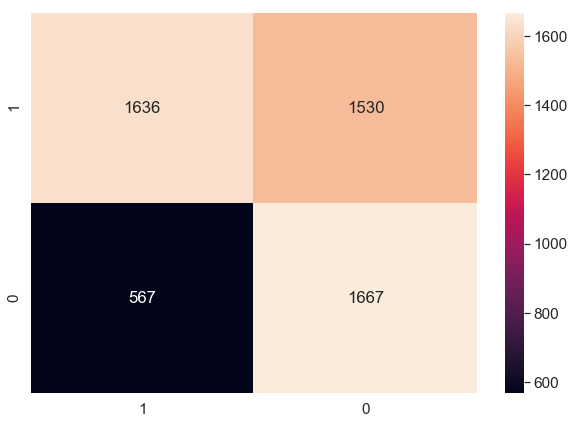

In [75]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [76]:
##analyize coeffictions
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,user,-0.126852
1,age,-0.165665
2,deposits,0.379005
3,withdrawal,0.062276
4,purchases_partners,-0.766191
5,purchases,-0.515906
6,cc_taken,0.100741
7,cc_recommended,0.098756
8,app_downloaded,-0.074831
9,web_user,0.132808


In [77]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()

In [78]:
final_results['predicted_churn'] = y_pred

In [79]:
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [80]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0
